<a href="https://colab.research.google.com/github/MUHAMMADFAWWAZWIYOGA/DIF2130_A_25_2311532019/blob/main/Pratikum4/Dimensi_Reduksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***REDUKSI DIMENSI***

kegiatan pratikum kali ini akan menggunakan dataset iris default disediakan oleh sklearn, untuk kegiatan pratikum biasa saja.

Kegiatan pratikum ini bertujuan untuk mereduksi dimensi yang ada dalam fitur dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris ['data']
y= iris['target']


n_sample, n_features =X.shape

print ('Number of sample :', n_sample)
print ('Number of features:', n_features)




Number of sample : 150
Number of features: 4


mencari hubungan antara fitur dengan visualisasi, sehingga harapan masing masing fiur akan terlihat

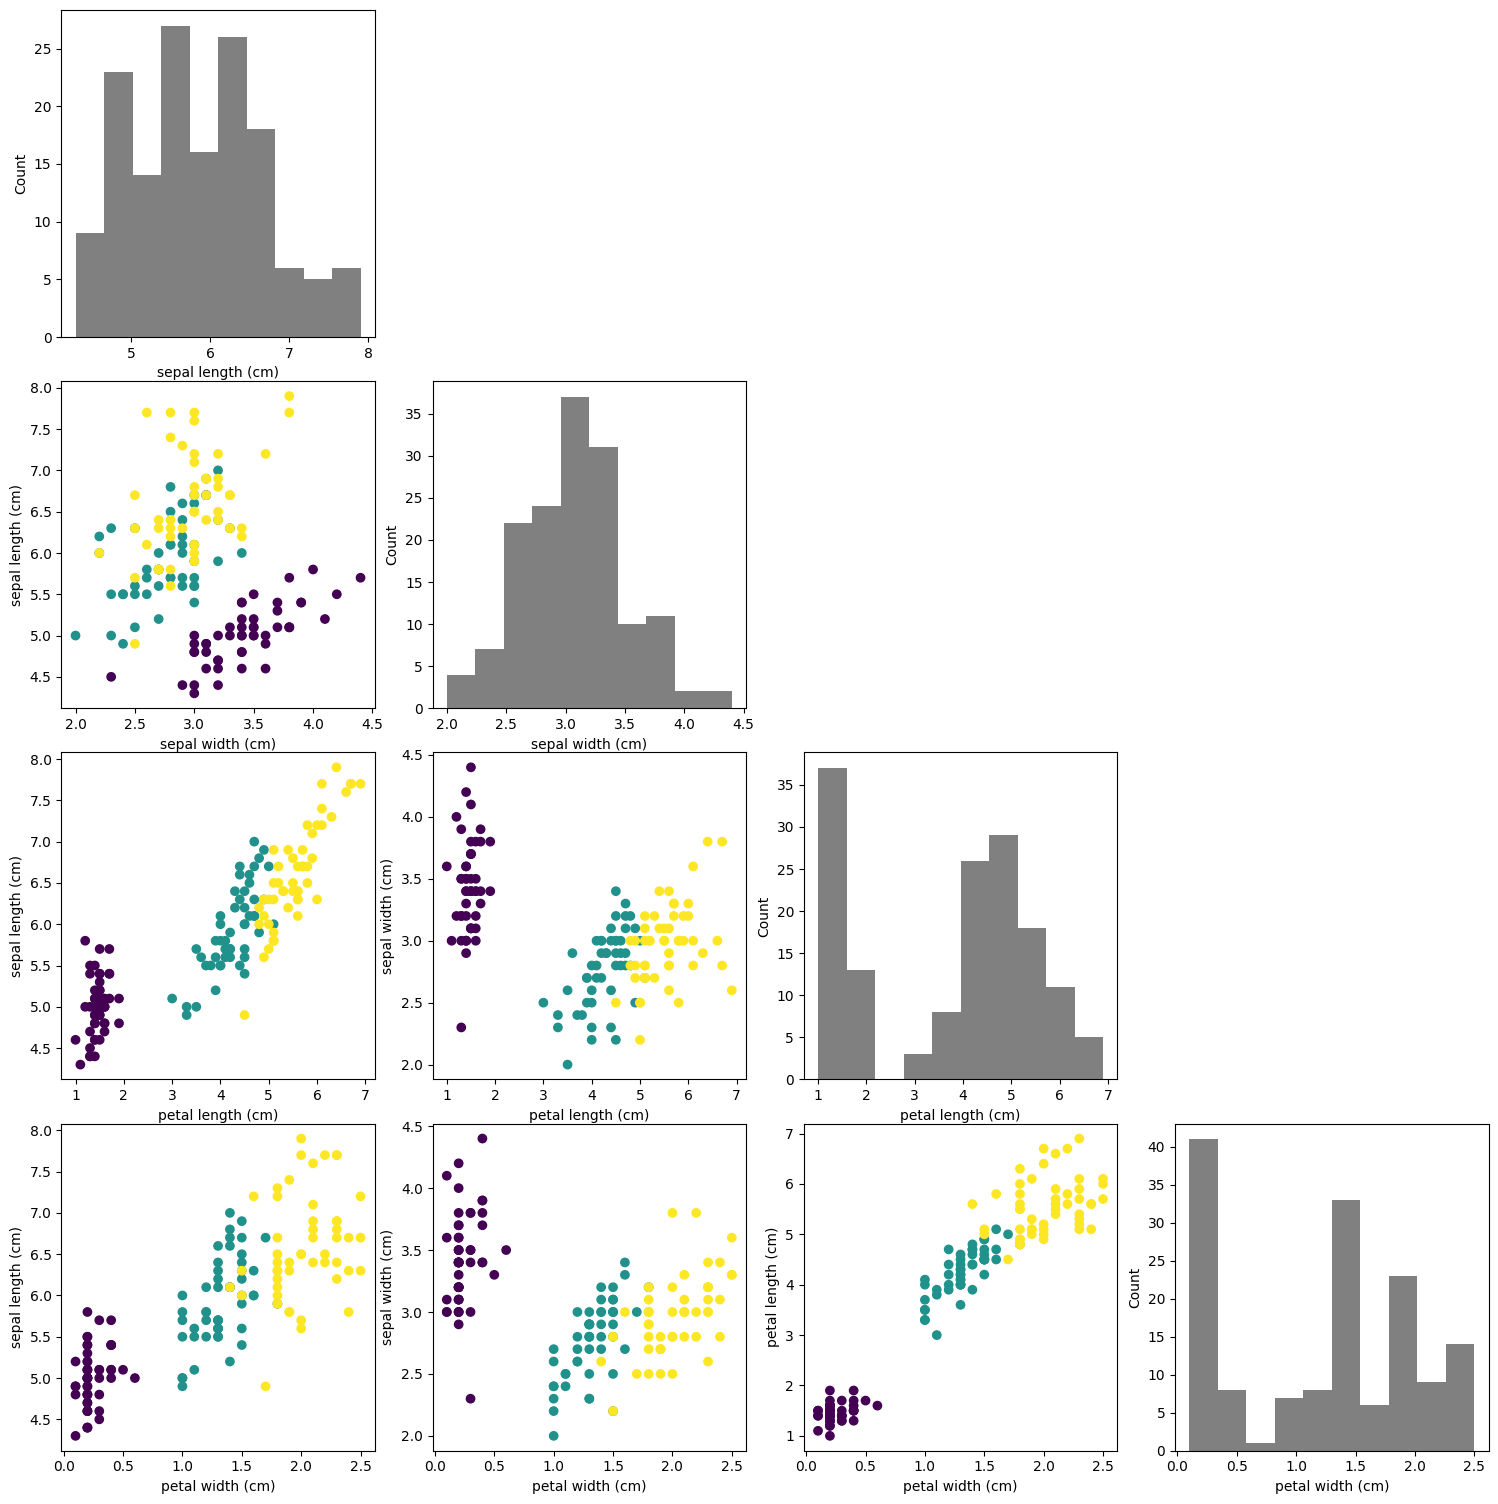

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(15,15))
fig.tight_layout()

names = iris.feature_names

for i,j in zip(*np.triu_indices_from(ax, k=1)):
        ax[j,i].scatter(X[:,j], X[:,i], c=y)
        ax[j,i].set_xlabel(names[j])
        ax[j,i].set_ylabel(names[i])
        ax[i,j].set_axis_off()

for i in range(n_features):
        ax[i,i].hist(X[:,i],color='grey')
        ax[i,i].set_ylabel('Count')
        ax[i,i].set_xlabel(names[i])

# ***Standarisasi data***

langkah ini memastika algoritma, dapat memproses kumpulan data secara efisien.Jika tidak dilakukan standarisasi data data yang memiliki nilai paling tinggi akan memiliki bobot yang paling tinggi, disini tujuan dari standarisasi data yaitu setiap data memiliki bobot yang sama walaupun nilai berbeda. Penggunaan z-score digunakan utnuk mencari nialli standar untuk setiap nilai dalam kumpulan data dengan cara mengurangi rata-rata fitur atau kolom dari etiap nilai x dalam kolom dan membaginya dengan deviasi standar

In [ ]:
def mean(x) :
    return sum(x)/len(x)

def std(x) :
  return ( sum ((i - mean (x)) ** 2 for i in x)/len(x))**0.5

def standarized_data(X):
  return ( X - mean(X))/std(X)

X_std = standarized_data(X)


print(X)
print( X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# ***Hitung covariance matrix***

covariance matrix adalahmatriks persegi yang menyimpan nilai-nilai kovarians antar pasangan variabel dalam sebuah dataset multivariat.

In [ ]:
def covariance (x):
  return (x.T @ x) / (x.shape[0]-1)

cov_mat = covariance(X_std)


print("Ukuran covariance matrix:", cov_mat.shape)

Ukuran covariance matrix: (4, 4)


# ***EIGEN VALUE dan EIGEN VECTOR***

selanjutnya melihat eigen value dan eigen vector

- Eigenvector menunjukkan arah vektor yang tidak berubah arah saat dilakukan transformasi linear (misalnya rotasi, skala, refleksi).

- Eigenvalue menunjukkan seberapa besar vektor tersebut diperbesar atau diperkecil oleh transformasi itu.

In [ ]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T
print ('Eigenvalue\n', eig_vals)
print ('Eigenvectors\n', eig_vecs)

Eigenvalue
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


selanjutnya, menghitung semua nilai eigen dan rata rata dari eigen yang akan di visulisasikan dengan graph.

Sehingga berdasarkan visualisasi ini, dapat dikethabui berapa dimensi harus ditetapkan berdasarkan rata rata yang ada.

Explained variance : [np.float64(72.96244541329987), np.float64(22.85076178670178), np.float64(3.668921889282875), np.float64(0.5178709107154741)]
Cumulative explained variance : [ 72.96244541  95.8132072   99.48212909 100.        ]


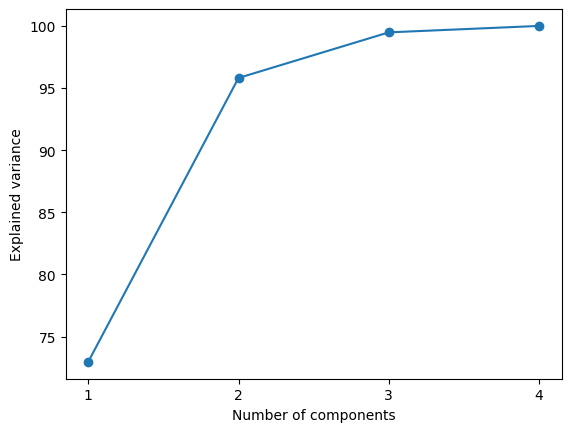

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in sorted(eig_vals, reverse=True)]
expalained_variance = np.round(explained_variance)
cum_explained_variance = np.cumsum(explained_variance)

print ( 'Explained variance : {}'.format(explained_variance))
print ( 'Cumulative explained variance : {}'.format(cum_explained_variance))

plt.plot(np.arange(1,len(explained_variance)+1), cum_explained_variance, '-o' )
plt.xticks(np.arange(1,len(explained_variance)+1))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

# ***Komponen Utama***

komponen utama atau principal component merupakan tahap pemilihan komponen yang akan digunakan pada dimensi, digunakan k sebagai fitur untuk menjadi jumlah dimensi

In [ ]:
k = 2

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Select the top k eigenvectors
W = np.array([pair[1] for pair in eig_pairs[:k]])

print(W.shape)

(2, 4)


# ***Proyeksikan Data***

In [ ]:
x_proj = X_std.dot (W.T)
print (x_proj.shape)

(150, 2)


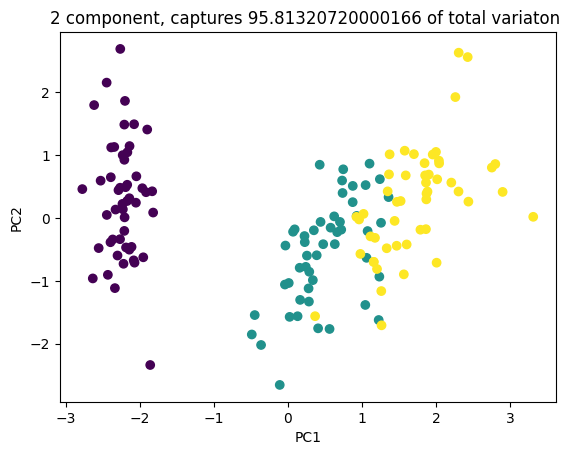

In [ ]:
plt.scatter(x_proj[:,0], x_proj[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 component, captures {} of total variaton '.format(cum_explained_variance[1]))
plt.show()

# ***SINGULAR VALUE DECOMPOSITION (SVD)***


metode ini merupakan metode paling umum digunakan dibandingkan dengan metode eigenvector.

 SVD secara langsung mendekomposisi matriks data asli (setelah data di-centering, yaitu setiap nilai dikurangi rata-ratanya) menjadi tiga matriks:

- U (matriks ortogonal kiri): Kolom-kolomnya disebut vektor singular kiri.
- Σ (matriks diagonal singular values): Elemen diagonalnya adalah nilai-nilai singular, yang berbanding lurus dengan akar kuadrat dari nilai eigen matriks kovarian.
- V T
(transpose dari matriks ortogonal kanan): Baris-barisnya (atau kolom-kolom V) adalah vektor singular kanan, yang juga merupakan Principal Components (vektor eigen) yang kita cari.


Shape of W (from SVD): (4, 2)
Shape of projected data (from SVD): (150, 2)


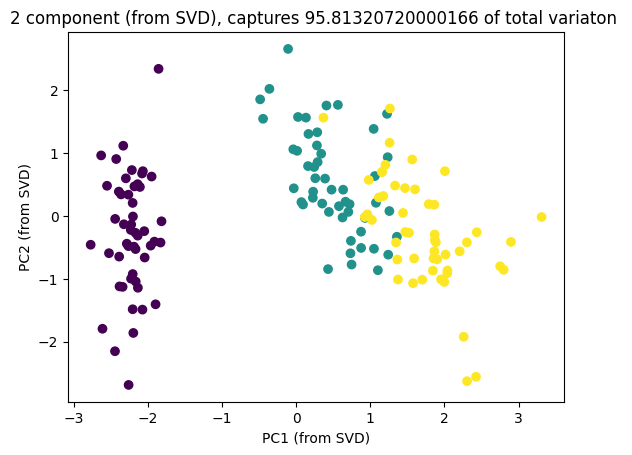

In [ ]:
# Metode SVD untuk PCA
from numpy.linalg import svd

# Hitung SVD dari data standar
U, s, V = svd(X_std)

# U adalah left singular vectors, s adalah singular values, V adalah right singular vectors (principal components)
# V.T adalah principal components
V = V.T

# Pilih k komponen utama
k = 2
W_svd = V[:, :k]

print("Shape of W (from SVD):", W_svd.shape)

# Proyeksikan data menggunakan komponen utama dari SVD
x_proj_svd = X_std.dot(W_svd)

print("Shape of projected data (from SVD):", x_proj_svd.shape)

# Visualisasi hasil PCA menggunakan SVD
plt.scatter(x_proj_svd[:,0], x_proj_svd[:,1], c=y)
plt.xlabel('PC1 (from SVD)')
plt.ylabel('PC2 (from SVD)')
# gunakan persentase varians yang dijelaskan dari metode eigenvalue/eigenvector sebelumnya
plt.title('2 component (from SVD), captures {} of total variaton '.format(cum_explained_variance[1]))
plt.show()